In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
df=pd.read_csv('./train.csv')
from tensorflow.keras import datasets, layers, models,Sequential
import os
from os import listdir
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import datasets, layers, models

In [2]:
from sklearn.model_selection import train_test_split
X=df['image_name'].tolist()
y=df['label'].astype(str).tolist()
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
train=pd.DataFrame(X_train,y_train)
train.reset_index(inplace=True)
train = train.rename(columns = {'index':'label'})
train = train.rename(columns = {0:'image_name'})
print(train)

valid=pd.DataFrame(X_valid,y_valid)
valid.reset_index(inplace=True)
valid = valid.rename(columns = {'index':'label'})
valid = valid.rename(columns = {0:'image_name'})
valid

      label image_name
0         0  12070.jpg
1         3  20627.jpg
2         2  22942.jpg
3         3   2879.jpg
4         2   4461.jpg
...     ...        ...
12770     5   5837.jpg
12771     0  12393.jpg
12772     3  22720.jpg
12773     0  10792.jpg
12774     0   8324.jpg

[12775 rows x 2 columns]


,label,image_name
0,2,8942.jpg
1,2,1894.jpg
2,5,15182.jpg
3,0,20186.jpg
4,4,19599.jpg
...,...,...
4254,2,5435.jpg
4255,5,13740.jpg
4256,4,4645.jpg
4257,1,13623.jpg


Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


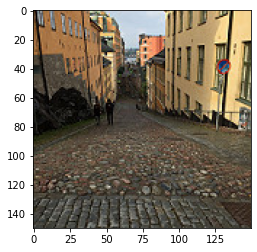

In [3]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

# VGG16 with Simple Datagen of only horiztontal Flip

In [57]:

from tensorflow.keras.applications.vgg16 import VGG16


base_model = VGG16(input_shape = (150,150, 3), # Shape of images
include_top = False,
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    


x = layers.Flatten()(base_model.output)


x = layers.Dense(512, activation='relu')(x)



x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, epochs = 15)


Epoch 1/15
639/639 [==============================] - 61s 94ms/step - loss: 0.4653 - categorical_accuracy: 0.8341 - val_loss: 0.3416 - val_categorical_accuracy: 0.8760
Epoch 2/15
639/639 [==============================] - 60s 94ms/step - loss: 0.3106 - categorical_accuracy: 0.8850 - val_loss: 0.3467 - val_categorical_accuracy: 0.8716
Epoch 3/15
639/639 [==============================] - 60s 94ms/step - loss: 0.2640 - categorical_accuracy: 0.9018 - val_loss: 0.4089 - val_categorical_accuracy: 0.8594
Epoch 4/15
639/639 [==============================] - 60s 94ms/step - loss: 0.2395 - categorical_accuracy: 0.9100 - val_loss: 0.3102 - val_categorical_accuracy: 0.8819
Epoch 5/15
639/639 [==============================] - 61s 96ms/step - loss: 0.2039 - categorical_accuracy: 0.9232 - val_loss: 0.3779 - val_categorical_accuracy: 0.8758
Epoch 6/15
639/639 [==============================] - 60s 93ms/step - loss: 0.1925 - categorical_accuracy: 0.9276 - val_loss: 0.3896 - val_categorical_accuracy:

In [9]:
model.save('saved_model/vgg16')

INFO:tensorflow:Assets written to: saved_model/vgg16\assets


The model above is with 100 steps per epoch. below is the model using number auto decsided

In [58]:
model.save('saved_model/vgg16-2')

INFO:tensorflow:Assets written to: saved_model/vgg16-2\assets


Lets try with dropout

# VGG16 with dropout of .15

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16


base_model = VGG16(input_shape = (150,150, 3), # Shape of  images
include_top = False, 
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    


x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)
x=layers.Dropout(.15)(x)


x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, steps_per_epoch = 100, epochs = 15)


Epoch 1/15
100/100 [==============================] - 36s 352ms/step - loss: 0.8568 - categorical_accuracy: 0.7010 - val_loss: 0.5098 - val_categorical_accuracy: 0.8086
Epoch 2/15
100/100 [==============================] - 35s 352ms/step - loss: 0.5837 - categorical_accuracy: 0.7755 - val_loss: 0.4676 - val_categorical_accuracy: 0.8302
Epoch 3/15
100/100 [==============================] - 35s 349ms/step - loss: 0.5602 - categorical_accuracy: 0.7805 - val_loss: 0.4109 - val_categorical_accuracy: 0.8436
Epoch 4/15
100/100 [==============================] - 36s 364ms/step - loss: 0.4990 - categorical_accuracy: 0.8185 - val_loss: 0.4639 - val_categorical_accuracy: 0.8281
Epoch 5/15
100/100 [==============================] - 37s 370ms/step - loss: 0.4728 - categorical_accuracy: 0.8280 - val_loss: 0.3947 - val_categorical_accuracy: 0.8554
Epoch 6/15
100/100 [==============================] - 37s 368ms/step - loss: 0.5343 - categorical_accuracy: 0.8135 - val_loss: 0.4235 - val_categorical_acc

Lets Try a high level of dropout

# VGG16 with dropout of .5

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16


base_model = VGG16(input_shape = (150,150, 3), # Shape of  images
include_top = False, 
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    


x = layers.Flatten()(base_model.output)


x = layers.Dense(512, activation='relu')(x)
x=layers.Dropout(.5)(x)


x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, steps_per_epoch = 100, epochs = 15)

Epoch 1/15
100/100 [==============================] - 37s 363ms/step - loss: 1.0190 - categorical_accuracy: 0.6325 - val_loss: 0.5140 - val_categorical_accuracy: 0.8028
Epoch 2/15
100/100 [==============================] - 36s 365ms/step - loss: 0.7040 - categorical_accuracy: 0.7310 - val_loss: 0.4956 - val_categorical_accuracy: 0.8154
Epoch 3/15
100/100 [==============================] - 38s 378ms/step - loss: 0.6105 - categorical_accuracy: 0.7690 - val_loss: 0.4087 - val_categorical_accuracy: 0.8535
Epoch 4/15
100/100 [==============================] - 39s 388ms/step - loss: 0.5841 - categorical_accuracy: 0.7780 - val_loss: 0.4572 - val_categorical_accuracy: 0.8321
Epoch 5/15
100/100 [==============================] - 37s 367ms/step - loss: 0.5807 - categorical_accuracy: 0.7875 - val_loss: 0.3957 - val_categorical_accuracy: 0.8598
Epoch 6/15
100/100 [==============================] - 38s 379ms/step - loss: 0.5723 - categorical_accuracy: 0.7920 - val_loss: 0.4064 - val_categorical_acc

Lets try no dropout and with zoom_range of .45

# VGG16 with zoom_range .45

Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


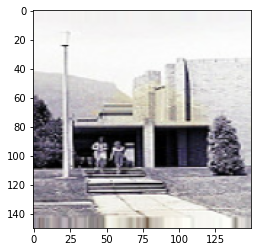

In [60]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=.45)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [61]:
from tensorflow.keras.applications.vgg16 import VGG16


base_model = VGG16(input_shape = (150,150, 3), # Shape of images
include_top = False,
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
#history = model.fit(train_gen, validation_data = valid_gen, steps_per_epoch = 100, epochs = 15)

In [27]:
model.save('saved_model/vgg16ZoomRange45')

INFO:tensorflow:Assets written to: saved_model/vgg16ZoomRange45\assets


In [63]:
history = model.fit(train_gen, validation_data = valid_gen, epochs = 15)

Epoch 1/15
639/639 [==============================] - 87s 136ms/step - loss: 0.4896 - categorical_accuracy: 0.8185 - val_loss: 0.3764 - val_categorical_accuracy: 0.8626
Epoch 2/15
639/639 [==============================] - 94s 147ms/step - loss: 0.4099 - categorical_accuracy: 0.8478 - val_loss: 0.3564 - val_categorical_accuracy: 0.8699
Epoch 3/15
639/639 [==============================] - 97s 151ms/step - loss: 0.3783 - categorical_accuracy: 0.8612 - val_loss: 0.3549 - val_categorical_accuracy: 0.8709
Epoch 4/15
639/639 [==============================] - 97s 152ms/step - loss: 0.3533 - categorical_accuracy: 0.8684 - val_loss: 0.3484 - val_categorical_accuracy: 0.8720
Epoch 5/15
639/639 [==============================] - 99s 154ms/step - loss: 0.3411 - categorical_accuracy: 0.8730 - val_loss: 0.3387 - val_categorical_accuracy: 0.8793
Epoch 6/15
639/639 [==============================] - 105s 164ms/step - loss: 0.3291 - categorical_accuracy: 0.8754 - val_loss: 0.3261 - val_categorical_ac

This model is the same as above but insted of set number of steps it uses the automoatically calculated number

In [64]:
model.save('saved_model/vgg16ZoomRange45-2')

INFO:tensorflow:Assets written to: saved_model/vgg16ZoomRange45-2\assets


Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


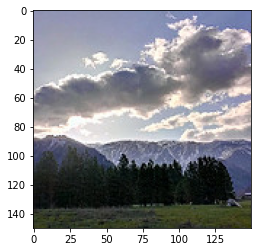

In [6]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 


# Inception with horizontal flip

In [37]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    

x = layers.Flatten()(base_model.output)

x = layers.Dense(128, activation='relu')(x)

x = layers.Dense(6, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, epochs = 15)


Epoch 1/15
639/639 [==============================] - 132s 193ms/step - loss: 0.6110 - categorical_accuracy: 0.8435 - val_loss: 0.3453 - val_categorical_accuracy: 0.8969
Epoch 2/15
639/639 [==============================] - 54s 84ms/step - loss: 0.2940 - categorical_accuracy: 0.8991 - val_loss: 0.2941 - val_categorical_accuracy: 0.9051
Epoch 3/15
639/639 [==============================] - 56s 88ms/step - loss: 0.2511 - categorical_accuracy: 0.9092 - val_loss: 0.3033 - val_categorical_accuracy: 0.9004
Epoch 4/15
639/639 [==============================] - 56s 87ms/step - loss: 0.2118 - categorical_accuracy: 0.9198 - val_loss: 0.2829 - val_categorical_accuracy: 0.9115
Epoch 5/15
639/639 [==============================] - 54s 85ms/step - loss: 0.2006 - categorical_accuracy: 0.9276 - val_loss: 0.3283 - val_categorical_accuracy: 0.9030
Epoch 6/15
639/639 [==============================] - 55s 86ms/step - loss: 0.1896 - categorical_accuracy: 0.9286 - val_loss: 0.3204 - val_categorical_accurac

In [38]:
model.save('saved_model_t0/inception3')

INFO:tensorflow:Assets written to: saved_model_t0/inception3\assets


# These steps are being used after the first attempts of using inception to see if I can get the model to predict better

In [39]:
from sklearn.metrics import accuracy_score
predList=[]
count=0


for filename in os.listdir('Mountains'):
        img = image.load_img("Mountains/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        if(pred.argmax()==3 or pred.argmax()==2):
            predList.append(3)
        else:
            predList.append(pred.argmax())
threes=np.full((22),3)
print("inception"+ ": " + str(accuracy_score(threes,predList)))

inception: 0.18181818181818182


In [40]:
predList=[]
test=pd.read_csv('test.csv')
test=test[:150]
predList=[]
count=0
for filename in test.image_name:
        img = image.load_img("train/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==150):
            break
test['labels '+str('inception')]=predList


In [42]:
test[:50]
test.to_csv("test_results_t2.csv")

Here I addeed the results to an excel file so i can then read that in using the predict notebook and see if this model is doing any better

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)
x=layers.Dropout(.15)(x)
x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, steps_per_epoch = 100, epochs = 15)

In [ ]:
model.save('saved_model/inceptionDropout15')

In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)
x=layers.Dropout(.30)(x)
x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, steps_per_epoch = 100, epochs = 15)

Epoch 1/15
  8/100 [=>............................] - ETA: 6s - loss: 15.2109 - categorical_accuracy: 0.4062

KeyboardInterrupt: 

# Inception with .5 dropout

In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)
x=layers.Dropout(.5)(x)
x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, steps_per_epoch = 100, epochs = 15)

Epoch 1/15
100/100 [==============================] - 34s 302ms/step - loss: 4.2008 - categorical_accuracy: 0.6890 - val_loss: 0.5142 - val_categorical_accuracy: 0.8460
Epoch 2/15
100/100 [==============================] - 26s 259ms/step - loss: 0.6207 - categorical_accuracy: 0.7945 - val_loss: 0.4082 - val_categorical_accuracy: 0.8629
Epoch 3/15
100/100 [==============================] - 23s 232ms/step - loss: 0.5407 - categorical_accuracy: 0.8035 - val_loss: 0.4194 - val_categorical_accuracy: 0.8511
Epoch 4/15
100/100 [==============================] - 25s 247ms/step - loss: 0.4506 - categorical_accuracy: 0.8505 - val_loss: 0.3583 - val_categorical_accuracy: 0.8727
Epoch 5/15
100/100 [==============================] - 23s 232ms/step - loss: 0.4493 - categorical_accuracy: 0.8405 - val_loss: 0.3592 - val_categorical_accuracy: 0.8659
Epoch 6/15
100/100 [==============================] - 24s 245ms/step - loss: 0.4475 - categorical_accuracy: 0.8485 - val_loss: 0.3713 - val_categorical_acc

Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


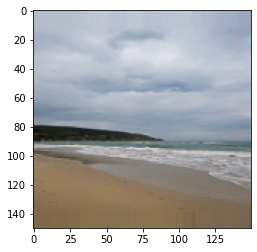

In [16]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=.30)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)
x=layers.Dropout(.5)(x)
x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, steps_per_epoch = 100, epochs = 15)

Epoch 1/15
100/100 [==============================] - 38s 337ms/step - loss: 4.2630 - categorical_accuracy: 0.6740 - val_loss: 0.4438 - val_categorical_accuracy: 0.8648
Epoch 2/15
100/100 [==============================] - 32s 319ms/step - loss: 0.6314 - categorical_accuracy: 0.7970 - val_loss: 0.3630 - val_categorical_accuracy: 0.8756
Epoch 3/15
100/100 [==============================] - 32s 319ms/step - loss: 0.5916 - categorical_accuracy: 0.7890 - val_loss: 0.3649 - val_categorical_accuracy: 0.8739
Epoch 4/15
100/100 [==============================] - 32s 318ms/step - loss: 0.5763 - categorical_accuracy: 0.7920 - val_loss: 0.3778 - val_categorical_accuracy: 0.8582
Epoch 5/15
100/100 [==============================] - 31s 316ms/step - loss: 0.5208 - categorical_accuracy: 0.8025 - val_loss: 0.3536 - val_categorical_accuracy: 0.8683
Epoch 6/15
100/100 [==============================] - 32s 323ms/step - loss: 0.5558 - categorical_accuracy: 0.8125 - val_loss: 0.3445 - val_categorical_acc

In [18]:
model.save('saved_model/inceptionZoom30')

INFO:tensorflow:Assets written to: saved_model/inceptionZoom30\assets


Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


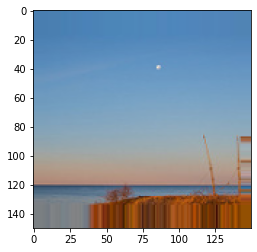

In [21]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=.30,shear_range=.30)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [22]:

from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)
x=layers.Dropout(.5)(x)
x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, steps_per_epoch = 100, epochs = 15)

Epoch 1/15
100/100 [==============================] - 40s 354ms/step - loss: 3.2358 - categorical_accuracy: 0.6880 - val_loss: 0.4703 - val_categorical_accuracy: 0.8481
Epoch 2/15
100/100 [==============================] - 33s 332ms/step - loss: 0.6614 - categorical_accuracy: 0.7920 - val_loss: 0.3543 - val_categorical_accuracy: 0.8772
Epoch 3/15
100/100 [==============================] - 32s 323ms/step - loss: 0.5939 - categorical_accuracy: 0.8000 - val_loss: 0.3628 - val_categorical_accuracy: 0.8659
Epoch 4/15
100/100 [==============================] - 32s 320ms/step - loss: 0.5415 - categorical_accuracy: 0.8130 - val_loss: 0.3450 - val_categorical_accuracy: 0.8774
Epoch 5/15
100/100 [==============================] - 32s 318ms/step - loss: 0.6456 - categorical_accuracy: 0.7930 - val_loss: 0.3337 - val_categorical_accuracy: 0.8786
Epoch 6/15
100/100 [==============================] - 32s 319ms/step - loss: 0.5415 - categorical_accuracy: 0.8130 - val_loss: 0.3530 - val_categorical_acc

In [23]:
model.save('saved_model/inceptionZoom30shear30')

INFO:tensorflow:Assets written to: saved_model/inceptionZoom30shear30\assets


Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


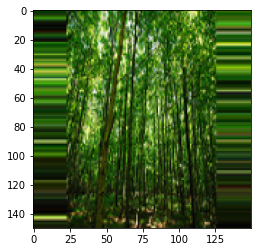

In [24]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=.45,)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [25]:

from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, steps_per_epoch = 100, epochs = 15)

Epoch 1/15
100/100 [==============================] - 57s 492ms/step - loss: 3.3257 - categorical_accuracy: 0.7103 - val_loss: 0.6784 - val_categorical_accuracy: 0.8373
Epoch 2/15
100/100 [==============================] - 45s 448ms/step - loss: 0.6533 - categorical_accuracy: 0.8010 - val_loss: 0.6690 - val_categorical_accuracy: 0.8000
Epoch 3/15
100/100 [==============================] - 44s 443ms/step - loss: 0.4967 - categorical_accuracy: 0.8405 - val_loss: 0.3567 - val_categorical_accuracy: 0.8824
Epoch 4/15
100/100 [==============================] - 44s 439ms/step - loss: 0.4904 - categorical_accuracy: 0.8355 - val_loss: 0.3548 - val_categorical_accuracy: 0.8720
Epoch 5/15
100/100 [==============================] - 41s 416ms/step - loss: 0.4287 - categorical_accuracy: 0.8541 - val_loss: 0.3739 - val_categorical_accuracy: 0.8699
Epoch 6/15
100/100 [==============================] - 42s 426ms/step - loss: 0.4249 - categorical_accuracy: 0.8575 - val_loss: 0.3496 - val_categorical_acc

In [26]:
model.save('saved_model/inceptionZoom45')

INFO:tensorflow:Assets written to: saved_model/inceptionZoom45\assets


# Setting up ResNet50

In [22]:

from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(150, 150,3), include_top=False, weights="imagenet")
for layer in base_model.layers:
    layer.trainable = False
base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(layers.Dense(6, activation='sigmoid'))
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
base_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 12294     
Total params: 23,600,006
Trainable params: 23,546,886
Non-trainable params: 53,120
_________________________________________________________________


using resnet50 preprocess function since regular was giving me horrible accuracy and others online suggested it as a fix

Found 12775 validated image filenames belonging to 6 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


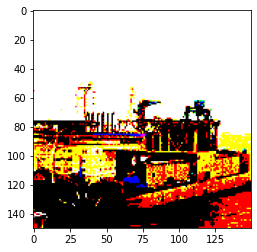

In [50]:
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.applications.resnet50 import preprocess_input
folder_dir = "./train/"
datagen_train =image.ImageDataGenerator(dtype='float32',preprocessing_function=preprocess_input)
datagen = image.ImageDataGenerator(dtype='float32',preprocessing_function=preprocess_input)
df.label=df.label.astype(str)

train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [46]:
resnet_history = base_model.fit(train_gen, validation_data = valid_gen, steps_per_epoch, epochs = 15)

Epoch 1/15
100/100 [==============================] - 40s 344ms/step - loss: 4.5720 - categorical_accuracy: 0.5335 - val_loss: 244.0525 - val_categorical_accuracy: 0.2533
Epoch 2/15
100/100 [==============================] - 34s 342ms/step - loss: 3.5642 - categorical_accuracy: 0.4737 - val_loss: 38.6042 - val_categorical_accuracy: 0.1867
Epoch 3/15
100/100 [==============================] - 36s 361ms/step - loss: 2.0578 - categorical_accuracy: 0.5490 - val_loss: 4.5629 - val_categorical_accuracy: 0.4060
Epoch 4/15
100/100 [==============================] - 33s 330ms/step - loss: 1.3991 - categorical_accuracy: 0.6470 - val_loss: 2.2401 - val_categorical_accuracy: 0.5518
Epoch 5/15
100/100 [==============================] - 34s 338ms/step - loss: 1.3111 - categorical_accuracy: 0.6807 - val_loss: 2.9336 - val_categorical_accuracy: 0.5978
Epoch 6/15
100/100 [==============================] - 34s 346ms/step - loss: 1.3230 - categorical_accuracy: 0.6725 - val_loss: 54.1725 - val_categorical

Trying again with more epochs and not litmiting the steps per epoch

In [52]:
resnet_history = base_model.fit(train_gen, validation_data = valid_gen, epochs = 25)

Epoch 1/25
639/639 [==============================] - 117s 174ms/step - loss: 1.5862 - categorical_accuracy: 0.7259 - val_loss: 47.8170 - val_categorical_accuracy: 0.3419
Epoch 2/25
639/639 [==============================] - 110s 173ms/step - loss: 1.2761 - categorical_accuracy: 0.7304 - val_loss: 1.4341 - val_categorical_accuracy: 0.4917
Epoch 3/25
639/639 [==============================] - 110s 173ms/step - loss: 1.0866 - categorical_accuracy: 0.7470 - val_loss: 1.6361 - val_categorical_accuracy: 0.7265
Epoch 4/25
639/639 [==============================] - 110s 172ms/step - loss: 0.7232 - categorical_accuracy: 0.8048 - val_loss: 0.6454 - val_categorical_accuracy: 0.7600
Epoch 5/25
639/639 [==============================] - 109s 170ms/step - loss: 0.6339 - categorical_accuracy: 0.8207 - val_loss: 0.9998 - val_categorical_accuracy: 0.6929
Epoch 6/25
639/639 [==============================] - 109s 171ms/step - loss: 0.6768 - categorical_accuracy: 0.8179 - val_loss: 1.7060 - val_categori

In [53]:
base_model.save('saved_model/ResNet50')

INFO:tensorflow:Assets written to: saved_model/ResNet50\assets


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


# Trying resnet 50 with horiztontal flip datagen

Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


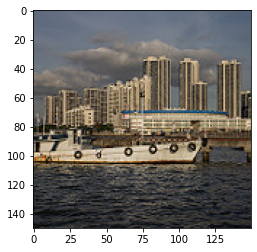

In [9]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [5]:
resnet_history = base_model.fit(train_gen, validation_data = valid_gen, epochs = 15)

Epoch 1/15
639/639 [==============================] - 137s 192ms/step - loss: 1.9079 - categorical_accuracy: 0.6404 - val_loss: 141.1587 - val_categorical_accuracy: 0.1406
Epoch 2/15
639/639 [==============================] - 108s 169ms/step - loss: 1.0485 - categorical_accuracy: 0.7000 - val_loss: 0.8514 - val_categorical_accuracy: 0.7351
Epoch 3/15
639/639 [==============================] - 108s 169ms/step - loss: 0.6770 - categorical_accuracy: 0.7850 - val_loss: 0.7378 - val_categorical_accuracy: 0.7403
Epoch 4/15
639/639 [==============================] - 112s 175ms/step - loss: 0.6225 - categorical_accuracy: 0.8093 - val_loss: 0.7297 - val_categorical_accuracy: 0.7351
Epoch 5/15
639/639 [==============================] - 108s 169ms/step - loss: 0.6043 - categorical_accuracy: 0.8237 - val_loss: 1.2191 - val_categorical_accuracy: 0.6170
Epoch 6/15
639/639 [==============================] - 108s 170ms/step - loss: 0.5189 - categorical_accuracy: 0.8396 - val_loss: 2.3488 - val_categor

In [6]:
base_model.save('saved_model/ResNet50')

INFO:tensorflow:Assets written to: saved_model/ResNet50\assets


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


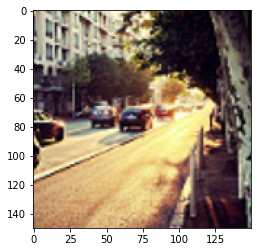

In [8]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=.45)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

# ResNet50 zoom 45

In [10]:
resnet_history = base_model.fit(train_gen, validation_data = valid_gen, epochs = 15)

Epoch 1/15
639/639 [==============================] - 116s 171ms/step - loss: 1.7463 - categorical_accuracy: 0.6765 - val_loss: 1.9119 - val_categorical_accuracy: 0.2609
Epoch 2/15
639/639 [==============================] - 106s 166ms/step - loss: 1.1476 - categorical_accuracy: 0.7256 - val_loss: 3.7082 - val_categorical_accuracy: 0.5849
Epoch 3/15
639/639 [==============================] - 106s 166ms/step - loss: 1.1515 - categorical_accuracy: 0.6863 - val_loss: 1.0163 - val_categorical_accuracy: 0.6267
Epoch 4/15
639/639 [==============================] - 106s 165ms/step - loss: 0.7783 - categorical_accuracy: 0.7605 - val_loss: 0.6046 - val_categorical_accuracy: 0.7838
Epoch 5/15
639/639 [==============================] - 107s 168ms/step - loss: 0.8849 - categorical_accuracy: 0.7686 - val_loss: 0.8353 - val_categorical_accuracy: 0.7288
Epoch 6/15
639/639 [==============================] - 106s 165ms/step - loss: 1.5588 - categorical_accuracy: 0.5935 - val_loss: 1.3325 - val_categoric

In [13]:
resnet_history = base_model.fit(train_gen, validation_data = valid_gen, epochs = 25,initial_epoch=15)

Epoch 16/25
639/639 [==============================] - 106s 166ms/step - loss: 0.4199 - categorical_accuracy: 0.8509 - val_loss: 0.5036 - val_categorical_accuracy: 0.8169
Epoch 17/25
639/639 [==============================] - 105s 165ms/step - loss: 0.4192 - categorical_accuracy: 0.8470 - val_loss: 0.8682 - val_categorical_accuracy: 0.7208
Epoch 18/25
639/639 [==============================] - 106s 166ms/step - loss: 0.4064 - categorical_accuracy: 0.8571 - val_loss: 0.4297 - val_categorical_accuracy: 0.8448
Epoch 19/25
639/639 [==============================] - 106s 165ms/step - loss: 0.3906 - categorical_accuracy: 0.8623 - val_loss: 1.1712 - val_categorical_accuracy: 0.6236
Epoch 20/25
639/639 [==============================] - 106s 166ms/step - loss: 0.3760 - categorical_accuracy: 0.8654 - val_loss: 2.2477 - val_categorical_accuracy: 0.4945
Epoch 21/25
639/639 [==============================] - 116s 182ms/step - loss: 0.3685 - categorical_accuracy: 0.8690 - val_loss: 0.5495 - val_cat

In [14]:
base_model.save('saved_model/ResNet50Zoom45')

INFO:tensorflow:Assets written to: saved_model/ResNet50Zoom45\assets


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


# ResNet50 zoom 30

Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


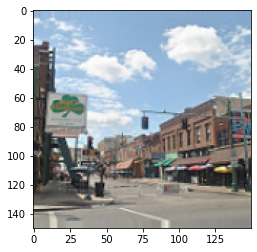

In [15]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=.30)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [17]:
resnet_history = base_model.fit(train_gen, validation_data = valid_gen, epochs = 20)

Epoch 1/20
639/639 [==============================] - 124s 184ms/step - loss: 2.1188 - categorical_accuracy: 0.6150 - val_loss: 1.9225 - val_categorical_accuracy: 0.1641
Epoch 2/20
639/639 [==============================] - 116s 181ms/step - loss: 0.9921 - categorical_accuracy: 0.7419 - val_loss: 0.6920 - val_categorical_accuracy: 0.7633
Epoch 3/20
639/639 [==============================] - 117s 183ms/step - loss: 0.7536 - categorical_accuracy: 0.7829 - val_loss: 1.1097 - val_categorical_accuracy: 0.6741
Epoch 4/20
639/639 [==============================] - 123s 193ms/step - loss: 0.7885 - categorical_accuracy: 0.7839 - val_loss: 3.2247 - val_categorical_accuracy: 0.6079
Epoch 5/20
639/639 [==============================] - 118s 185ms/step - loss: 0.7350 - categorical_accuracy: 0.7917 - val_loss: 2.6461 - val_categorical_accuracy: 0.3776
Epoch 6/20
639/639 [==============================] - 116s 182ms/step - loss: 0.6452 - categorical_accuracy: 0.8152 - val_loss: 0.4404 - val_categoric

In [18]:
base_model.save('saved_model/ResNet50Zoom30')

INFO:tensorflow:Assets written to: saved_model/ResNet50Zoom30\assets


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


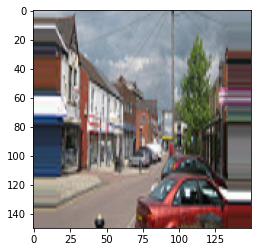

In [21]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=.45,shear_range=.30)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [23]:
resnet_history = base_model.fit(train_gen, validation_data = valid_gen, epochs = 20)

Epoch 1/20
639/639 [==============================] - 119s 176ms/step - loss: 1.8790 - categorical_accuracy: 0.6539 - val_loss: 2.1564 - val_categorical_accuracy: 0.2651
Epoch 2/20
639/639 [==============================] - 107s 167ms/step - loss: 1.4693 - categorical_accuracy: 0.6251 - val_loss: 47.3411 - val_categorical_accuracy: 0.2846
Epoch 3/20
639/639 [==============================] - 106s 166ms/step - loss: 0.9762 - categorical_accuracy: 0.7106 - val_loss: 1.6020 - val_categorical_accuracy: 0.6854
Epoch 4/20
639/639 [==============================] - 107s 167ms/step - loss: 0.9311 - categorical_accuracy: 0.7479 - val_loss: 107.9452 - val_categorical_accuracy: 0.3663
Epoch 5/20
639/639 [==============================] - 106s 166ms/step - loss: 0.7482 - categorical_accuracy: 0.7744 - val_loss: 0.4992 - val_categorical_accuracy: 0.8293
Epoch 6/20
639/639 [==============================] - 106s 166ms/step - loss: 0.7228 - categorical_accuracy: 0.7855 - val_loss: 0.7760 - val_catego

In [24]:
base_model.save('saved_model/ResNet50Zoom4Shear30')

INFO:tensorflow:Assets written to: saved_model/ResNet50Zoom4Shear30\assets


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


# ResNet50 With relu and Dropout(.25)

In [37]:

from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(150, 150,3), include_top=False, weights="imagenet")
for layer in base_model.layers:
    layer.trainable = False
base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(layers.Dense(512, activation='relu'))
base_model.add(layers.Dropout(.25))
base_model.add(layers.Dense(6, activation='sigmoid'))
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
base_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_11 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 3078      
Total params: 24,639,878
Trainable params: 24,586,758
Non-trainable params: 53,120
_________________________________________________________________


In [38]:
resnet_history = base_model.fit(train_gen, validation_data = valid_gen, epochs = 15)

Epoch 1/15
639/639 [==============================] - 114s 169ms/step - loss: 1.2443 - categorical_accuracy: 0.6689 - val_loss: 1.9282 - val_categorical_accuracy: 0.2430
Epoch 2/15
639/639 [==============================] - 107s 167ms/step - loss: 0.7100 - categorical_accuracy: 0.7414 - val_loss: 0.5729 - val_categorical_accuracy: 0.7971
Epoch 3/15
639/639 [==============================] - 107s 168ms/step - loss: 0.5663 - categorical_accuracy: 0.8049 - val_loss: 0.5655 - val_categorical_accuracy: 0.8084
Epoch 4/15
639/639 [==============================] - 106s 167ms/step - loss: 0.5602 - categorical_accuracy: 0.8005 - val_loss: 0.7701 - val_categorical_accuracy: 0.6762
Epoch 5/15
639/639 [==============================] - 107s 167ms/step - loss: 0.5468 - categorical_accuracy: 0.8042 - val_loss: 1.4262 - val_categorical_accuracy: 0.5288
Epoch 6/15
639/639 [==============================] - 108s 169ms/step - loss: 0.7498 - categorical_accuracy: 0.7212 - val_loss: 1.5944 - val_categoric

In [39]:
base_model.save('saved_model/ResNetReluDropout')

INFO:tensorflow:Assets written to: saved_model/ResNetReluDropout\assets


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


# Moved saved models to saved_model_t

In [7]:

from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(150, 150,3), include_top=False, weights="imagenet")
for layer in base_model.layers:
    layer.trainable = False
base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(layers.Dense(6, activation='softmax'))
base_model.add(layers.Flatten())
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 12294     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6)                 0         
Total params: 23,600,006
Trainable params: 23,546,886
Non-trainable params: 53,120
_________________________________________________________________


In [8]:
resnet_history = base_model.fit(train_gen, validation_data = valid_gen, epochs =25)

Epoch 1/25
639/639 [==============================] - 119s 177ms/step - loss: 1.8912 - categorical_accuracy: 0.5343 - val_loss: 13.3939 - val_categorical_accuracy: 0.1608
Epoch 2/25
639/639 [==============================] - 112s 175ms/step - loss: 1.9987 - categorical_accuracy: 0.5331 - val_loss: 9.1516 - val_categorical_accuracy: 0.2904
Epoch 3/25
639/639 [==============================] - 109s 171ms/step - loss: 1.7524 - categorical_accuracy: 0.5739 - val_loss: 2.9477 - val_categorical_accuracy: 0.5365
Epoch 4/25
639/639 [==============================] - 109s 171ms/step - loss: 1.6749 - categorical_accuracy: 0.6040 - val_loss: 0.9644 - val_categorical_accuracy: 0.6340
Epoch 5/25
639/639 [==============================] - 109s 171ms/step - loss: 1.5177 - categorical_accuracy: 0.6239 - val_loss: 1.3009 - val_categorical_accuracy: 0.5168
Epoch 6/25
639/639 [==============================] - 110s 172ms/step - loss: 1.4035 - categorical_accuracy: 0.6416 - val_loss: 2.2938 - val_categori

In [9]:
base_model.save('saved_model_t0/ResNet')

INFO:tensorflow:Assets written to: saved_model_t0/ResNet\assets


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [13]:
predList=[]
test=pd.read_csv('test.csv')
test=test[:150]
predList=[]
count=0
for filename in test.image_name:
        img = image.load_img("train/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=base_model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==150):
            break
test['labels '+str('resNet')]=predList


In [14]:
test

,image_name,labels resNet
0,3.jpg,4
1,5.jpg,4
2,6.jpg,4
3,11.jpg,4
4,14.jpg,4
...,...,...
145,494.jpg,4
146,497.jpg,4
147,498.jpg,4
148,499.jpg,4


# Testing model with no frozen layers

In [ ]:

from tensorflow.keras.applications import ResNet50
kernel=(3,3)
count=0
base_model = ResNet50(input_shape=(150, 150,3), include_top=False, weights="imagenet")
#model with no frozen layers

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(6, activation='softmax'))
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
base_model.summary()

In [34]:
resnet_history = base_model.fit(train_gen, validation_data = valid_gen, epochs =25)

Epoch 1/25
639/639 [==============================] - 140s 220ms/step - loss: 0.7282 - categorical_accuracy: 0.7376 - val_loss: 1.6563 - val_categorical_accuracy: 0.4609
Epoch 2/25
639/639 [==============================] - 136s 214ms/step - loss: 0.5713 - categorical_accuracy: 0.7950 - val_loss: 2.4236 - val_categorical_accuracy: 0.3968
Epoch 3/25
639/639 [==============================] - 136s 213ms/step - loss: 0.4479 - categorical_accuracy: 0.8406 - val_loss: 2.5565 - val_categorical_accuracy: 0.5663
Epoch 4/25
639/639 [==============================] - 138s 216ms/step - loss: 0.3731 - categorical_accuracy: 0.8712 - val_loss: 0.5271 - val_categorical_accuracy: 0.8185
Epoch 5/25
639/639 [==============================] - 136s 213ms/step - loss: 0.3497 - categorical_accuracy: 0.8798 - val_loss: 0.6206 - val_categorical_accuracy: 0.7666
Epoch 6/25
639/639 [==============================] - 136s 213ms/step - loss: 0.3297 - categorical_accuracy: 0.8849 - val_loss: 0.4538 - val_categoric

In [35]:
base_model.save('saved_model_t0/ResNet2')

INFO:tensorflow:Assets written to: saved_model_t0/ResNet2\assets


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [36]:
predList=[]
test=pd.read_csv('test.csv')
test=test[:150]
predList=[]
count=0
for filename in test.image_name:
        img = image.load_img("train/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=base_model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==150):
            break
test['labels '+str('resNet')]=predList


In [39]:
test[:50]

,image_name,labels resNet
0,3.jpg,3
1,5.jpg,3
2,6.jpg,3
3,11.jpg,3
4,14.jpg,3
5,22.jpg,3
6,25.jpg,3
7,28.jpg,3
8,30.jpg,3
9,38.jpg,3


It still seems to classify everything as one class

# Test with more layers trainable

In [11]:

from tensorflow.keras.applications import ResNet50
kernel=(3,3)
count=0
base_model = ResNet50(input_shape=(150, 150,3), include_top=False, weights="imagenet")
#model with no frozen layers
for layer in base_model.layers:
    layer.trainable = False
    if(count==158):
        break
    count+=1
base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(6, activation='softmax'))
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
base_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_6 (Dense)              (None, 64)                131136    
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 390       
Total params: 23,719,238
Trainable params: 23,666,118
Non-trainable params: 53,120
_________________________________________________________________


In [12]:
resnet_history = base_model.fit(train_gen, validation_data = valid_gen, epochs =25)

Epoch 1/25
639/639 [==============================] - 146s 219ms/step - loss: 0.7768 - categorical_accuracy: 0.7818 - val_loss: 1.6639 - val_categorical_accuracy: 0.4708
Epoch 2/25
639/639 [==============================] - 139s 217ms/step - loss: 0.7177 - categorical_accuracy: 0.7373 - val_loss: 1.5920 - val_categorical_accuracy: 0.2332
Epoch 3/25
639/639 [==============================] - 139s 218ms/step - loss: 0.5946 - categorical_accuracy: 0.7871 - val_loss: 1.1045 - val_categorical_accuracy: 0.5708
Epoch 4/25
639/639 [==============================] - 139s 218ms/step - loss: 0.5096 - categorical_accuracy: 0.8152 - val_loss: 0.6348 - val_categorical_accuracy: 0.7636
Epoch 5/25
639/639 [==============================] - 145s 227ms/step - loss: 0.3871 - categorical_accuracy: 0.8690 - val_loss: 0.4104 - val_categorical_accuracy: 0.8612
Epoch 6/25
639/639 [==============================] - 143s 223ms/step - loss: 0.3917 - categorical_accuracy: 0.8668 - val_loss: 1.0310 - val_categoric

KeyboardInterrupt: 

In [13]:
base_model.save('saved_model_t0/ResNet3')

INFO:tensorflow:Assets written to: saved_model_t0/ResNet3\assets


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [14]:
predList=[]
test=pd.read_csv('test.csv')
test=test[:150]
predList=[]
count=0
for filename in test.image_name:
        img = image.load_img("train/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=base_model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==150):
            break
test['labels '+str('resNet')]=predList


In [16]:
test[:50]

,image_name,labels resNet
0,3.jpg,0
1,5.jpg,0
2,6.jpg,0
3,11.jpg,0
4,14.jpg,0
5,22.jpg,0
6,25.jpg,0
7,28.jpg,0
8,30.jpg,0
9,38.jpg,0


In [19]:

from tensorflow.keras.applications.vgg19 import VGG19


base_model = VGG19(input_shape = (150,150, 3), # Shape of images
include_top = False,
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    


x = layers.Flatten()(base_model.output)


x = layers.Dense(512, activation='relu')(x)



x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, epochs = 15)


Epoch 1/15
639/639 [==============================] - 105s 163ms/step - loss: 0.5147 - categorical_accuracy: 0.8205 - val_loss: 0.3822 - val_categorical_accuracy: 0.8610
Epoch 2/15
639/639 [==============================] - 102s 160ms/step - loss: 0.3373 - categorical_accuracy: 0.8719 - val_loss: 0.4046 - val_categorical_accuracy: 0.8533
Epoch 3/15
639/639 [==============================] - 102s 160ms/step - loss: 0.2876 - categorical_accuracy: 0.8917 - val_loss: 0.3592 - val_categorical_accuracy: 0.8758
Epoch 4/15
639/639 [==============================] - 102s 160ms/step - loss: 0.2703 - categorical_accuracy: 0.8986 - val_loss: 0.3602 - val_categorical_accuracy: 0.8709
Epoch 5/15
639/639 [==============================] - 106s 167ms/step - loss: 0.2383 - categorical_accuracy: 0.9108 - val_loss: 0.3674 - val_categorical_accuracy: 0.8770
Epoch 6/15
639/639 [==============================] - 103s 161ms/step - loss: 0.2172 - categorical_accuracy: 0.9180 - val_loss: 0.3680 - val_categoric

In [24]:
predList=[]
test=pd.read_csv('test.csv')
test=test[:150]
predList=[]
count=0
for filename in test.image_name:
        img = image.load_img("train/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        print(pred)
        predList.append(pred.argmax())
        count+=1
        if(count==150):
            break
test['labels '+str('vgg19')]=predList


[[0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 1. 0.]]
[[0. 0. 1. 1. 0. 0.]]
[[1. 0. 0. 0. 0. 1.]]
[[0. 1. 0. 0. 0. 0.]]
[[4.5925476e-34 0.0000000e+00 1.0000000e+00 5.6014305e-16 1.0000000e+00
  0.0000000e+00]]
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 5.9533595e-28
  0.0000000e+00]]
[[0. 0. 1. 1. 1. 0.]]
[[0. 0. 1. 1. 0. 0.]]
[[0. 0. 1. 1. 0. 0.]]
[[0. 0. 1. 1. 0. 0.]]
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.7985772e-20]]
[[0. 0. 0. 1. 0. 1.]]
[[4.0739414e-35 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
[[4.414732e-15 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  1.000000e+00]]
[[0.        0.        1.        1.        0.4494865 0.       ]]
[[1. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 1.]]
[[0. 0. 1. 1. 0. 0.]]
[[1.0000000e+00 0.0000000e+00 3.3717046e-10 1.0000000e+00 2.8751957e-32
  0.0000000e+00]]
[[1. 0. 0. 0. 0. 1.]]
[[0. 0. 1. 1. 1. 0.]]
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000

In [25]:
test[:50]

,image_name,labels vgg19
0,3.jpg,5
1,5.jpg,0
2,6.jpg,4
3,11.jpg,2
4,14.jpg,0
5,22.jpg,1
6,25.jpg,2
7,28.jpg,2
8,30.jpg,2
9,38.jpg,2


In [26]:
model.save('saved_model_t/vgg19')

INFO:tensorflow:Assets written to: saved_model_t/vgg19\assets


Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


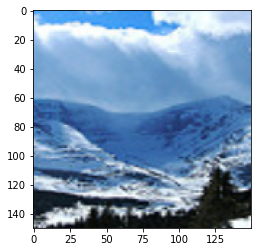

In [43]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=.45)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))


valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [44]:

from tensorflow.keras.applications.vgg19 import VGG19


base_model = VGG19(input_shape = (150,150, 3), # Shape of images
include_top = False,
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    


x = layers.Flatten()(base_model.output)


x = layers.Dense(512, activation='relu')(x)



x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, epochs = 15)


Epoch 1/15
639/639 [==============================] - 107s 166ms/step - loss: 0.6050 - categorical_accuracy: 0.7761 - val_loss: 0.4431 - val_categorical_accuracy: 0.8345
Epoch 2/15
639/639 [==============================] - 107s 167ms/step - loss: 0.4626 - categorical_accuracy: 0.8270 - val_loss: 0.3814 - val_categorical_accuracy: 0.8601
Epoch 3/15
639/639 [==============================] - 107s 167ms/step - loss: 0.4263 - categorical_accuracy: 0.8444 - val_loss: 0.3669 - val_categorical_accuracy: 0.8601
Epoch 4/15
639/639 [==============================] - 106s 165ms/step - loss: 0.4047 - categorical_accuracy: 0.8485 - val_loss: 0.3869 - val_categorical_accuracy: 0.8669
Epoch 5/15
639/639 [==============================] - 109s 170ms/step - loss: 0.3914 - categorical_accuracy: 0.8534 - val_loss: 0.3320 - val_categorical_accuracy: 0.8791
Epoch 6/15
639/639 [==============================] - 112s 175ms/step - loss: 0.3763 - categorical_accuracy: 0.8599 - val_loss: 0.3609 - val_categoric

In [45]:
model.save('saved_model_t/vgg19Zoom45')

INFO:tensorflow:Assets written to: saved_model_t/vgg19Zoom45\assets


# Trying ResNet with input image size of 224

Testing with image size of 224 since it is the size recomended in the documentation so I will see if this make the model work better

Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 224, 224, 3)
(224, 224, 3)


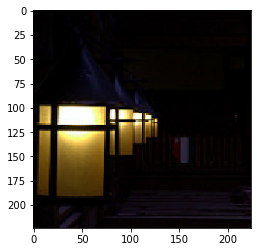

In [4]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(224,224))


valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(224,224))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [5]:

from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")
for layer in base_model.layers:
    layer.trainable = False
base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(layers.Dense(6, activation='sigmoid'))
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 23,600,006
Trainable params: 23,546,886
Non-trainable params: 53,120
_________________________________________________________________


In [6]:
resnet_history = base_model.fit(train_gen, validation_data = valid_gen, epochs =15)

Epoch 1/15
639/639 [==============================] - 227s 331ms/step - loss: 1.9475 - categorical_accuracy: 0.6951 - val_loss: 1.9449 - val_categorical_accuracy: 0.1646
Epoch 2/15
639/639 [==============================] - 188s 294ms/step - loss: 0.7196 - categorical_accuracy: 0.7890 - val_loss: 1.5576 - val_categorical_accuracy: 0.6412
Epoch 3/15
639/639 [==============================] - 185s 290ms/step - loss: 0.5927 - categorical_accuracy: 0.8293 - val_loss: 48.6464 - val_categorical_accuracy: 0.2705
Epoch 4/15
639/639 [==============================] - 184s 287ms/step - loss: 0.6057 - categorical_accuracy: 0.8189 - val_loss: 0.9313 - val_categorical_accuracy: 0.6767
Epoch 5/15
639/639 [==============================] - 179s 281ms/step - loss: 0.5685 - categorical_accuracy: 0.8290 - val_loss: 1.7671 - val_categorical_accuracy: 0.5292
Epoch 6/15
639/639 [==============================] - 181s 284ms/step - loss: 0.4792 - categorical_accuracy: 0.8558 - val_loss: 0.9086 - val_categori

In [9]:
predList=[]
test=pd.read_csv('test.csv')
test=test[:150]
predList=[]
count=0
for filename in test.image_name:
        img = image.load_img("train/" +str(filename), target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=base_model.predict(x)
      
        predList.append(pred.argmax())
        count+=1
        if(count==150):
            break
test['labels '+str('vgg19')]=predList


In [10]:
test

,image_name,labels vgg19
0,3.jpg,0
1,5.jpg,0
2,6.jpg,0
3,11.jpg,0
4,14.jpg,0
...,...,...
145,494.jpg,0
146,497.jpg,0
147,498.jpg,0
148,499.jpg,0


It seems that resnet is still only classifying as one class

Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


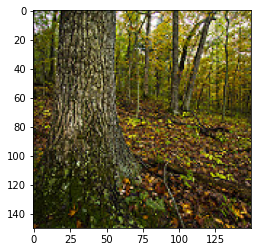

In [16]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))


valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [23]:

from tensorflow.keras.applications import ResNet50


base_model = ResNet50(input_shape = (150,150, 3), # Shape of images
include_top = False,
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    


x = layers.Flatten()(base_model.output)


x = layers.Dense(512, activation='relu')(x)



x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, epochs = 15)


Epoch 1/15
639/639 [==============================] - 72s 108ms/step - loss: 1.2587 - categorical_accuracy: 0.5187 - val_loss: 0.9466 - val_categorical_accuracy: 0.6262
Epoch 2/15
639/639 [==============================] - 64s 100ms/step - loss: 0.9535 - categorical_accuracy: 0.6146 - val_loss: 1.0384 - val_categorical_accuracy: 0.6081
Epoch 3/15
639/639 [==============================] - 63s 99ms/step - loss: 0.8768 - categorical_accuracy: 0.6507 - val_loss: 0.9182 - val_categorical_accuracy: 0.6560
Epoch 4/15
639/639 [==============================] - 62s 98ms/step - loss: 0.8470 - categorical_accuracy: 0.6623 - val_loss: 0.8490 - val_categorical_accuracy: 0.6715
Epoch 5/15
639/639 [==============================] - 64s 100ms/step - loss: 0.8224 - categorical_accuracy: 0.6762 - val_loss: 0.7914 - val_categorical_accuracy: 0.6821
Epoch 6/15
639/639 [==============================] - 66s 103ms/step - loss: 0.7917 - categorical_accuracy: 0.6862 - val_loss: 0.7796 - val_categorical_accur

In [26]:
predList=[]
test=pd.read_csv('test.csv')
test=test[:150]
predList=[]
count=0
for filename in test.image_name:
        img = image.load_img("train/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
      
        predList.append(pred.argmax())
        count+=1
        if(count==150):
            break
test['labels '+str('resnet50')]=predList


In [28]:
test[:50]

,image_name,labels resnet50
0,3.jpg,0
1,5.jpg,0
2,6.jpg,0
3,11.jpg,0
4,14.jpg,0
5,22.jpg,0
6,25.jpg,0
7,28.jpg,0
8,30.jpg,0
9,38.jpg,0


Found 12775 validated image filenames belonging to 6 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


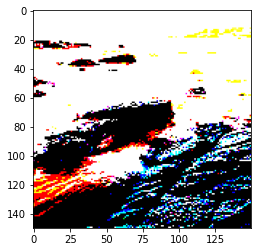

In [18]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
from tensorflow.keras.applications.resnet50 import preprocess_input
datagen_train=image.ImageDataGenerator(preprocessing_function=preprocess_input)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))


valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

# Trying ResNet50 again using Resnet50 preprocess function

In [19]:

from tensorflow.keras.applications import ResNet50


base_model = ResNet50(input_shape = (150,150, 3), # Shape of images
include_top = False,
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    


x = layers.Flatten()(base_model.output)


x = layers.Dense(512, activation='relu')(x)



x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, epochs = 5)


Epoch 1/5
639/639 [==============================] - 64s 89ms/step - loss: 1.1667 - categorical_accuracy: 0.8899 - val_loss: 2.9325 - val_categorical_accuracy: 0.1587
Epoch 2/5
639/639 [==============================] - 50s 79ms/step - loss: 0.1585 - categorical_accuracy: 0.9492 - val_loss: 3.1166 - val_categorical_accuracy: 0.1587
Epoch 3/5
639/639 [==============================] - 51s 80ms/step - loss: 0.1021 - categorical_accuracy: 0.9695 - val_loss: 3.0169 - val_categorical_accuracy: 0.1587
Epoch 4/5
639/639 [==============================] - 50s 79ms/step - loss: 0.1083 - categorical_accuracy: 0.9706 - val_loss: 2.5965 - val_categorical_accuracy: 0.1587
Epoch 5/5
639/639 [==============================] - 51s 79ms/step - loss: 0.1194 - categorical_accuracy: 0.9724 - val_loss: 2.9230 - val_categorical_accuracy: 0.1519


In [37]:
predList=[]
test=pd.read_csv('test.csv')
test=test[:150]
predList=[]
count=0
for filename in test.image_name:
        img = image.load_img("train/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
      
        predList.append(pred.argmax())
        count+=1
        if(count==150):
            break
test['labels '+str('resnet50')]=predList


In [40]:
test[:50]
model.save('saved_model_t_prePrp/ResNet50PrePro')

INFO:tensorflow:Assets written to: saved_model_t/ResNet50PrePro\assets


C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [41]:
test.to_csv("test_results_RNPRE.csv")

Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


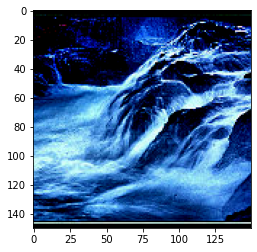

In [5]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
from tensorflow.keras.applications.inception_v3 import preprocess_input
datagen_train=image.ImageDataGenerator(preprocessing_function=preprocess_input)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))


valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3



base_model =  InceptionV3(input_shape = (150,150, 3), # Shape of images
include_top = False,
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    


x = layers.Flatten()(base_model.output)


x = layers.Dense(512, activation='relu')(x)



x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, epochs = 5)


Epoch 1/5
639/639 [==============================] - 115s 164ms/step - loss: 0.9414 - categorical_accuracy: 0.8475 - val_loss: 0.4390 - val_categorical_accuracy: 0.8516
Epoch 2/5
639/639 [==============================] - 43s 67ms/step - loss: 0.2603 - categorical_accuracy: 0.9053 - val_loss: 0.3260 - val_categorical_accuracy: 0.8838
Epoch 3/5
639/639 [==============================] - 44s 68ms/step - loss: 0.2104 - categorical_accuracy: 0.9228 - val_loss: 0.3546 - val_categorical_accuracy: 0.8767
Epoch 4/5
639/639 [==============================] - 43s 67ms/step - loss: 0.1732 - categorical_accuracy: 0.9347 - val_loss: 0.3629 - val_categorical_accuracy: 0.8718
Epoch 5/5
639/639 [==============================] - 41s 65ms/step - loss: 0.1563 - categorical_accuracy: 0.9409 - val_loss: 0.4159 - val_categorical_accuracy: 0.8619


In [7]:
predList=[]
test=pd.read_csv('test.csv')
test=test[:150]
predList=[]
count=0
for filename in test.image_name:
        img = image.load_img("train/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
      
        predList.append(pred.argmax())
        count+=1
        if(count==150):
            break
test['labels '+str('resnet50')]=predList


In [8]:
test[:50]

,image_name,labels resnet50
0,3.jpg,3
1,5.jpg,2
2,6.jpg,1
3,11.jpg,4
4,14.jpg,1
5,22.jpg,0
6,25.jpg,3
7,28.jpg,1
8,30.jpg,0
9,38.jpg,1


In [9]:
model.save('saved_model_t_prePro/inceptionPrePro')

INFO:tensorflow:Assets written to: saved_model_t_prePro/ResNet50PrePro\assets


Found 12775 validated image filenames belonging to 6 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


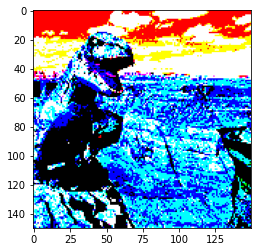

In [17]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
from tensorflow.keras.applications.vgg16 import preprocess_input
datagen_train=image.ImageDataGenerator(preprocessing_function=preprocess_input)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))


valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [12]:

from tensorflow.keras.applications.vgg16 import VGG16


base_model = VGG16(input_shape = (150,150, 3), # Shape of images
include_top = False,
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    


x = layers.Flatten()(base_model.output)


x = layers.Dense(512, activation='relu')(x)



x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, epochs = 5)


Epoch 1/5
639/639 [==============================] - 87s 135ms/step - loss: 1.2046 - categorical_accuracy: 0.8698 - val_loss: 1.5798 - val_categorical_accuracy: 0.4550
Epoch 2/5
639/639 [==============================] - 83s 130ms/step - loss: 0.2439 - categorical_accuracy: 0.9318 - val_loss: 1.5013 - val_categorical_accuracy: 0.4144
Epoch 3/5
639/639 [==============================] - 82s 129ms/step - loss: 0.1503 - categorical_accuracy: 0.9561 - val_loss: 1.5284 - val_categorical_accuracy: 0.4269
Epoch 4/5
639/639 [==============================] - 83s 130ms/step - loss: 0.1167 - categorical_accuracy: 0.9667 - val_loss: 1.4859 - val_categorical_accuracy: 0.5513
Epoch 5/5
639/639 [==============================] - 84s 132ms/step - loss: 0.1219 - categorical_accuracy: 0.9709 - val_loss: 1.7774 - val_categorical_accuracy: 0.2374


In [14]:
predList=[]
test=pd.read_csv('test.csv')
test=test[:150]
predList=[]
count=0
for filename in test.image_name:
        img = image.load_img("train/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
      
        predList.append(pred.argmax())
        count+=1
        if(count==150):
            break
test['labels '+str('resnet50')]=predList


In [15]:
test[:50]

,image_name,labels resnet50
0,3.jpg,5
1,5.jpg,0
2,6.jpg,4
3,11.jpg,2
4,14.jpg,5
5,22.jpg,1
6,25.jpg,4
7,28.jpg,3
8,30.jpg,2
9,38.jpg,2


In [16]:
model.save('saved_model_t_prePro/vgg16PrePro')

INFO:tensorflow:Assets written to: saved_model_t_prePro/vgg16PrePro\assets


Found 12775 validated image filenames belonging to 6 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


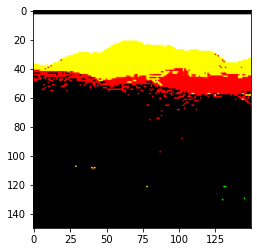

In [22]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
from tensorflow.keras.applications.vgg19 import preprocess_input
datagen_train=image.ImageDataGenerator(preprocessing_function=preprocess_input)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))


valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [23]:

from tensorflow.keras.applications.vgg19 import VGG19


base_model = VGG19(input_shape = (150,150, 3), # Shape of images
include_top = False,
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    


x = layers.Flatten()(base_model.output)


x = layers.Dense(512, activation='relu')(x)



x = layers.Dense(6, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(train_gen, validation_data = valid_gen, epochs = 5)


Epoch 1/5
639/639 [==============================] - 79s 122ms/step - loss: 1.3006 - categorical_accuracy: 0.8695 - val_loss: 1.5941 - val_categorical_accuracy: 0.4287
Epoch 2/5
639/639 [==============================] - 80s 125ms/step - loss: 0.2588 - categorical_accuracy: 0.9335 - val_loss: 1.6393 - val_categorical_accuracy: 0.3771
Epoch 3/5
639/639 [==============================] - 81s 128ms/step - loss: 0.1536 - categorical_accuracy: 0.9534 - val_loss: 1.6902 - val_categorical_accuracy: 0.3170
Epoch 4/5
639/639 [==============================] - 78s 123ms/step - loss: 0.1338 - categorical_accuracy: 0.9658 - val_loss: 1.6117 - val_categorical_accuracy: 0.2620
Epoch 5/5
639/639 [==============================] - 76s 119ms/step - loss: 0.1708 - categorical_accuracy: 0.9620 - val_loss: 1.5789 - val_categorical_accuracy: 0.4142


In [24]:
model.save('saved_model_t_prePro/vgg19PrePro')

INFO:tensorflow:Assets written to: saved_model_t_prePro/vgg19PrePro\assets
